In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
from keras import regularizers
import seaborn as sns
import matplotlib.pyplot as plt



In [131]:
dataset = pd.read_csv('data.csv')

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

# Encoding categorical data
le = LabelEncoder()
y = le.fit_transform(y)

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# One-hot encoding the output variable
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [133]:
# ann = tf.keras.models.Sequential()

# # Adding the input layer and the first hidden layer
# ann.add(tf.keras.layers.Dense(units=32, activation='relu', input_dim=3, kernel_regularizer=regularizers.l2(0.01)))
# ann.add(tf.keras.layers.Dropout(0.5))

# # Adding more hidden layers with dropout
# ann.add(tf.keras.layers.Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# ann.add(tf.keras.layers.Dropout(0.5))

# ann.add(tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# ann.add(tf.keras.layers.Dropout(0.5))

# ann.add(tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# ann.add(tf.keras.layers.Dropout(0.5))

# # Adding the output layer
# ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))

# # Compiling the ANN
# ann.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])



ann = tf.keras.models.Sequential()

# # Adding the input layer and the first hidden layer
# ann.add(tf.keras.layers.Dense(units=32, activation='relu', input_dim=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01)))
# ann.add(tf.keras.layers.Dropout(0.5))

# # Adding more hidden layers with dropout
# ann.add(tf.keras.layers.Dense(units=128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01)))
# ann.add(tf.keras.layers.Dropout(0.5))

# ann.add(tf.keras.layers.Dense(units=64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01)))
# ann.add(tf.keras.layers.Dropout(0.5))

# ann.add(tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01)))
# ann.add(tf.keras.layers.Dropout(0.5))

# # Adding the output layer
# ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))

# # Compiling the ANN
# ann.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

#.55 and .47
ann.add(tf.keras.layers.Dense(units=32, activation=None, input_dim=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01)))
ann.add(tf.keras.layers.BatchNormalization())
ann.add(tf.keras.layers.Activation('relu'))
ann.add(tf.keras.layers.Dropout(0.6))  # Experiment with higher dropout rates

# Adding more hidden layers with Batch Normalization and Dropout
ann.add(tf.keras.layers.Dense(units=128, activation=None, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01)))
ann.add(tf.keras.layers.BatchNormalization())
ann.add(tf.keras.layers.Activation('relu'))
ann.add(tf.keras.layers.Dropout(0.6))

ann.add(tf.keras.layers.Dense(units=64, activation=None, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01)))
ann.add(tf.keras.layers.BatchNormalization())
ann.add(tf.keras.layers.Activation('relu'))
ann.add(tf.keras.layers.Dropout(0.6))

ann.add(tf.keras.layers.Dense(units=32, activation=None, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01)))
ann.add(tf.keras.layers.BatchNormalization())
ann.add(tf.keras.layers.Activation('relu'))
ann.add(tf.keras.layers.Dropout(0.6))

# Adding the output layer
ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))
ann.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])


# ann.add(tf.keras.layers.Dense(units=16, activation=None, input_dim=3, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01)))
# ann.add(tf.keras.layers.BatchNormalization())
# ann.add(tf.keras.layers.Activation('relu'))
# ann.add(tf.keras.layers.Dropout(0.8))  # Experiment with higher dropout rates

# # Adding more hidden layers with Batch Normalization and Dropout
# ann.add(tf.keras.layers.Dense(units=32, activation=None, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01)))
# ann.add(tf.keras.layers.BatchNormalization())
# ann.add(tf.keras.layers.Activation('relu'))
# ann.add(tf.keras.layers.Dropout(0.8))

# ann.add(tf.keras.layers.Dense(units=16, activation=None, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.01)))
# ann.add(tf.keras.layers.BatchNormalization())
# ann.add(tf.keras.layers.Activation('relu'))
# ann.add(tf.keras.layers.Dropout(0.8))

# # Adding the output layer
# ann.add(tf.keras.layers.Dense(units=3, activation='softmax'))

# # Compiling the ANN with a lower learning rate
# initial_learning_rate = 0.01
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True
# )

# optimizer = tf.keras.optimizers.SGD(learning_rate=lr_schedule)

# # Compile the model with the custom optimizer
# ann.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Adding EarlyStopping callback
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
# callbacks = [early_stopping]

In [134]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
callbacks = [early_stopping]

# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
# callbacks = [early_stopping]

In [135]:
# history = ann.fit(X_train, y_train_encoded, batch_size=32, epochs=50, validation_data=(X_test, y_test_encoded), callbacks=callbacks)
history = ann.fit(X_train, y_train_encoded, batch_size=16, epochs=50, validation_data=(X_test, y_test_encoded), callbacks=callbacks)


Epoch 1/50
1279/1279 [==============================] - 12s 7ms/step - loss: 3.3596 - accuracy: 0.5653 - val_loss: 2.4161 - val_accuracy: 0.7515
Epoch 2/50
1279/1279 [==============================] - 7s 6ms/step - loss: 1.9642 - accuracy: 0.7141 - val_loss: 1.4118 - val_accuracy: 0.8104
Epoch 3/50
1279/1279 [==============================] - 7s 6ms/step - loss: 1.2360 - accuracy: 0.7971 - val_loss: 0.8043 - val_accuracy: 0.9181
Epoch 4/50
1279/1279 [==============================] - 7s 5ms/step - loss: 0.8171 - accuracy: 0.8487 - val_loss: 0.5416 - val_accuracy: 0.9849
Epoch 5/50
1279/1279 [==============================] - 7s 5ms/step - loss: 0.6721 - accuracy: 0.8638 - val_loss: 0.6023 - val_accuracy: 0.9578
Epoch 6/50
1279/1279 [==============================] - 7s 6ms/step - loss: 0.6353 - accuracy: 0.8638 - val_loss: 0.6885 - val_accuracy: 0.6962
Epoch 7/50
1279/1279 [==============================] - 7s 6ms/step - loss: 0.6147 - accuracy: 0.8715 - val_loss: 0.6505 - val_accuracy

In [129]:
_, train_accuracy = ann.evaluate(X_train, y_train_encoded)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")


640/640 [==============================] - 1s 2ms/step - loss: 0.3362 - accuracy: 0.9702
Training Accuracy: 97.02%


In [130]:
loss, test_accuracy = ann.evaluate(X_test, y_test_encoded)
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')



160/160 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.9738
Testing Accuracy: 97.38%


In [47]:
# Predicting the Test set results
y_pred = ann.predict(X_test)

# Converting predicted probabilities to class labels
y_pred_class = y_pred.argmax(axis=1)
print("Predicted Classes:")
print(y_pred_class)

160/160 [==============================] - 1s 3ms/step
Predicted Classes:
[2 0 0 ... 0 2 2]


[[1641    0    0]
 [   0 1709   11]
 [   0   16 1738]]


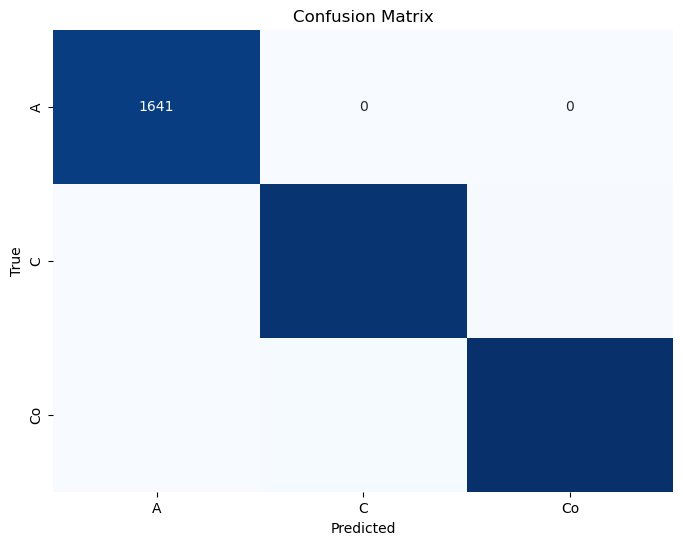

In [48]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_class)
print(conf_matrix)


# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
classes = ['A','C','Co']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


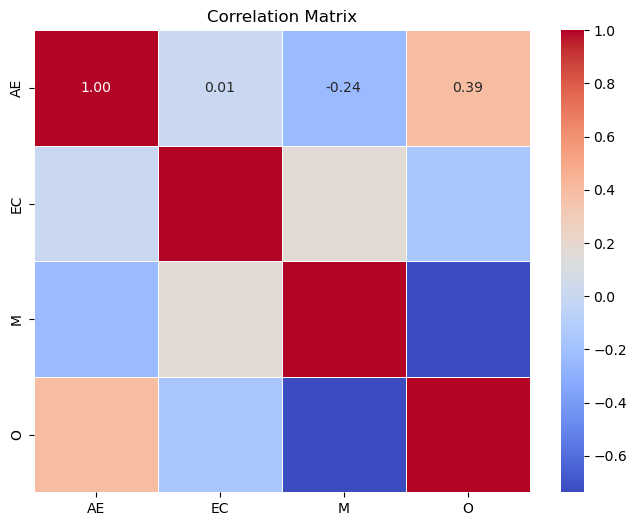

In [49]:
df = dataset.iloc[:,1:]
# Assuming df is your DataFrame with the data
# If you have a correlation matrix directly, you can skip the next line
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Plot the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix')
plt.show()


In [50]:
test = ann.predict(sc.transform([[3.5426830286659757e-06,0.24547880116959062,0.3226955560075358]]))
print(test.argmax(axis=1))

1/1 [==============================] - 0s 37ms/step
[0]


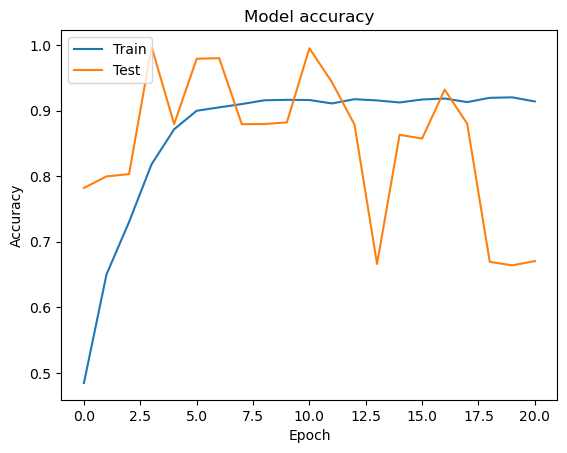

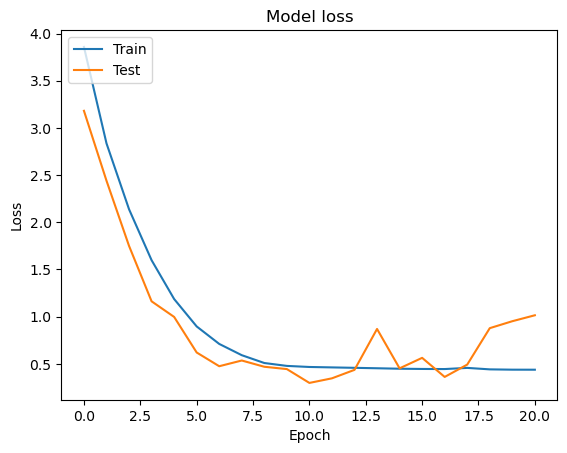

In [51]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

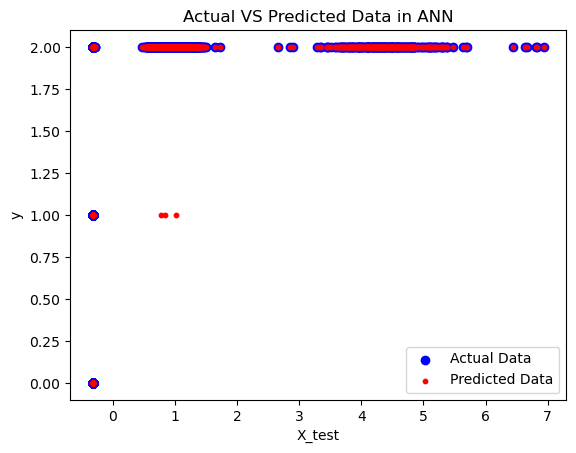

In [52]:
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual Data')
plt.scatter(X_test[:, 0], y_pred_class, color='red', label='Predicted Data',s=10)
plt.title('Actual VS Predicted Data in ANN')
plt.xlabel('X_test')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_class contain the actual and predicted labels, respectively

# Plot for Label 0
plt.scatter(X_test[y_test == 0, 0], y_test[y_test == 0], color='blue', label='Actual Label 0')
plt.scatter(X_test[y_pred_class == 0, 0], y_pred_class[y_pred_class == 0], color='red', label='Predicted Label 0', s=10)

# Plot for Label 1
plt.scatter(X_test[y_test == 1, 0], y_test[y_test == 1], color='green', label='Actual Label 1')
plt.scatter(X_test[y_pred_class == 1, 0], y_pred_class[y_pred_class == 1], color='orange', label='Predicted Label 1', s=10)

# Plot for Label 2
plt.scatter(X_test[y_test == 2, 0], y_test[y_test == 2], color='purple', label='Actual Label 2')
plt.scatter(X_test[y_pred_class == 2, 0], y_pred_class[y_pred_class == 2], color='pink', label='Predicted Label 2', s=10)

plt.title('Actual VS Predicted Data for Each Label')
plt.xlabel('X_test')
plt.ylabel('y')
plt.legend()
plt.show()
